# Basic Usage

In [3]:
#2021/04/05 Tutorial on basic functions
# 
# these lines update the imported module if code is changed, you can remove them if not needed.

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%reset
import os
import numpy as np

In [5]:
# this cell is hidden, it will not be shown
fn = r'G:\My Drive\progetti\ion_beam\specchio_beatrix\exemplar_data\MFT-txt\EN4-2-100.txt'
fn2 = r'G:\My Drive\progetti\c_overcoating\esperimenti\20200214_batch2_IrC\20200306_MFT_calibration\01_18803_A.csv'

infolder = r'G:\Shared drives\ion beam\dati\lavorazioni\2021_VERTX_RUN01_zerodur'

fdiff = 'VERT-X - VX01 - Zerodur - After-Before IBF.dat'
fdiff = os.path.join(infolder,fdiff)

# infolder=r'C:\Users\kovor\Documents\python\pyXTel\source\pySurf\test\input_data\4D\180215_C1S06_cut'
# #r'..\..\source\pySurf\test\input_data\4D\180215_C1S06_cut'
# fn = '180215_C1S01_RefSub.csv'
# file = os.path.join(infolder,fn)


## Overview

`PySurf` library consists in a set of classes and functions, representing 2D (or related) data and operations on them.

First thing is importing it:


In [6]:
from pySurf.data2D_class import Data2D

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


The most basic way to initialize such an object is by passing directly 2D data, (optionally) coordinates and options.

Come vediamo puo' essere inizializzato con data,x,y e tante altre cose. Tipicamente pero' vorremo leggere dati da qualche file.
C'e' un'argomento reader per selezionare una funzione per leggere i dati, ve ne sono per molti comuni strumenti e formati, o puo' essere implementata custom.
Se il reader non e' passato esplicitamente, prova ad indovinare il formato, ed in genere ci azzecca abbastanza. 

## Importing Data

Quindi proviamo a leggere qualche dato (salvato da MFT in formato testo):

Functions for reading common formats of 2D data are collected in `pySurf.readers` module. The structure and interface of readers is described elsewhere, a reader is essentially a function able to obtain `data, x, y` from a data file, however if the interface is correctly implemented, a reader from `pySurf.readers.instrumentReader` can be passed as argument to at object creation. In this case, additional information (e.g. from header or metadata) are automatically added to the object.

For example, here we read an AFM file in `.nid` format:

In [7]:
from pySurf.data2D_class import Data2D
from pySurf.instrumentReader import nid_reader

D = Data2D(file, strip=True, reader = nid_reader)
D.plot()

module moved, modify your import to use readers.instrumentReader


NameError: name 'file' is not defined

In [8]:
d.plot()

NameError: name 'd' is not defined

if no options are provided, the library tries to guess from file extension, and in general tries to complete the object with all possible information from data and metadata. Here a file is read from a standard Zygo `.dat` format:

In [9]:
fn2 = r'..\..\..\source\pySurf\test\input_data\MFT\08_cos02_bare.dat'

d = Data2D(fn2) 
print ("Return object", d)

d.plot()

SyntaxError: invalid syntax (2781663613.py, line 1)

Notiamo tuttavia che le unita' degli assi sono scomode (ed ignote), vorrei anche collocare il centro dell'immagine sull'origine (potrebbe pero' essere ovunque).
I can also invert y axis to match format specs:

In [10]:
d = Data2D(fn2,units=['mm','mm','nm'],center=(0,0),scale=(1000,-1000,1))  #this matches exactly Gwyddion
d.plot()

first argument is string, use it as filename


c:\users\kovor\documents\python\pyxtel\source\pySurf\data2D.py:1301: DeprecationWarning: invalid escape sequence \m
  '''
c:\users\kovor\documents\python\pyxtel\source\pySurf\readers\format_reader.py:54: DeprecationWarning: invalid escape sequence \M
  '''from manual: Complete maps of the header formats can be obtained by running the dat_test.exe


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\My Drive\\progetti\\c_overcoating\\esperimenti\\20200214_batch2_IrC\\20200306_MFT_calibration\\01_18803_A.csv'

This is an example of how I can read a simple matrix csv file, passed by a colleague, that was stripped of the header and has an arbitrary delimiter, scale (correct by wavelength), etc. 

first argument is string, use it as filename
fileformat ``.txt``not recognized for file ..\..\..\source\pySurf\test\input_data\MFT-txt\EN4-2-100.txt
Use generic text reader


<Axes: title={'center': 'EN4-2-100.txt'}, xlabel='X (mm)', ylabel='Y (mm)'>

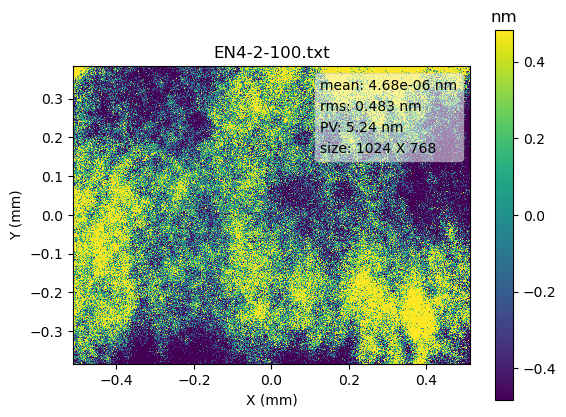

In [11]:
fn = r'..\..\..\source\pySurf\test\input_data\MFT-txt\EN4-2-100.txt'
d2 = Data2D(fn,units=['mm','mm','nm'],center=(0,0),matrix=1,delimiter='',scale=(0.001,0.001,635.)) #this matches exactly MFT software
d2.plot()

The returned object represents a set of data and axis. These can be returned calling the object itself:

In [12]:
d()

NameError: name 'd' is not defined

## Data manipulation functions

Basic operations like cropping or leveling can be applied by means of corresponding methods. Information about methods and options can be obtained by means of usual Python introspection methods.

Here some example:


In [13]:
D2 = D.level((4,2))
D2.plot()  #Level 4 legendre along `x` and 2 along `y`.

NameError: name 'D' is not defined

`plotting` module contains commodity functions for plotting of data and comparisons, we use `plotting.multiplots.compare_images` to compare the original data with the modified version.